In [1]:
from datetime import datetime, timedelta
from shapely import LineString, Point
from mobilib import Trajectory
import mobilib as mobilib
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('./privacy_toy.csv')

In [3]:
traj = mobilib.Trajectory(df=test, x='lng', y='lat', t='datetime',is_latlng=True)

In [4]:
traj.gdf

,uid,geometry,_index
datetime,,,
2011-02-03 08:34:04,1,POINT (10.50799 43.84301),0
2011-02-03 09:34:04,1,POINT (10.32615 43.54427),1
2011-02-03 10:34:04,1,POINT (10.40360 43.70853),2
2011-02-04 10:34:04,1,POINT (11.24626 43.77925),3
2011-02-03 08:34:04,2,POINT (10.50799 43.84301),4
2011-02-03 09:34:04,2,POINT (10.40360 43.70853),5
2011-02-04 10:34:04,2,POINT (10.50799 43.84301),6
2011-02-04 11:34:04,2,POINT (10.32615 43.54427),7
2011-02-03 08:34:04,3,POINT (10.32615 43.54427),8


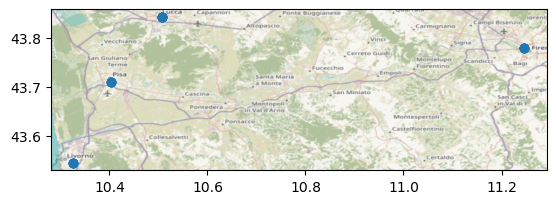

In [5]:
mobilib.visualization.image.plot(traj)

### LocationAttack

In [6]:
traj.gdf['lat'] = traj.gdf['geometry'].x
traj.gdf['lng'] = traj.gdf['geometry'].y

In [9]:
location_attack = mobilib.privacy.attacks.LocationAttack(knowledge_length=2)
risk = location_attack.assess_risk(traj, show_progress=True)
risk

computing risk: 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


,uid,risk
0,1,0.333333
1,2,0.500000
2,3,0.333333
3,4,0.333333
4,5,0.250000
5,6,0.250000
6,7,0.500000


### Home Work Attack

In [8]:
home_word_attack = mobilib.privacy.attacks.HomeWorkAttack(knowledge_length=2)
risk = home_word_attack.assess_risk(traj, show_progress=True)
risk

computing risk:   0%|          | 0/7 [00:00<?, ?it/s]

computing risk: 100%|██████████| 7/7 [00:00<00:00, 38.75it/s]


,uid,risk
0,1,0.25
1,2,0.25
2,3,0.25
3,4,0.25
4,5,1.00
5,6,1.00
6,7,1.00
